<a href="https://colab.research.google.com/github/abuzarbagewadi/CNN_Image_Classifier/blob/master/CNN_Image_Classifier1.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries 

In [29]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    



### Preprocessing Data

In [30]:
def get_three_classes(x, y):
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)

    indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [31]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, y_train = get_three_classes(x_train, y_train)
x_test, y_test = get_three_classes(x_test, y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


### Visualising Examples

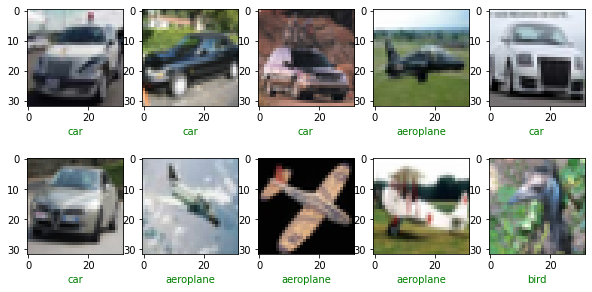

In [32]:
class_names = ['aeroplane', 'car', 'bird']

def show_random_examples(x,y,p) :
  indices = np.random.choice(range(x.shape[0]), 10, replace=False)

  x=x[indices]
  y=y[indices]
  p=p[indices]

  plt.figure(figsize=(10, 5))
  for i in range(10):
    plt.subplot(2, 5, 1 + i)
    plt.imshow(x[i])
    plt.xticks()
    plt.yticks()
    col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
    plt.xlabel(class_names[np.argmax(p[i])], color=col)
  plt.show()

show_random_examples(x_train, y_train, y_train)




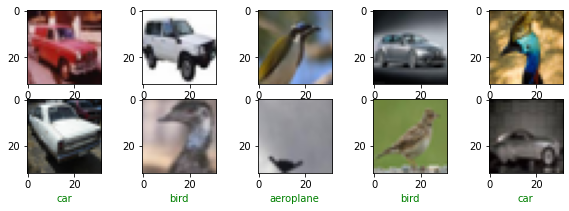

In [33]:
class_names = ['aeroplane', 'car', 'bird']

def show_random_examples(x,y,p) :
  indices = np.random.choice(range(y.shape[0]), 10, replace=False)

  x=x[indices]
  y=y[indices]
  p=p[indices]

  plt.figure(figsize=(10, 3))
  for i in range(10):
    plt.subplot(2, 5, 1 + i)
    plt.imshow(x[i])
    plt.xticks()
    plt.yticks()
    col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
    plt.xlabel(class_names[np.argmax(p[i])], color=col)
  plt.show()

show_random_examples(x_test, y_test, y_test)

### Creating a CNN Model

In [34]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

def create_model():
  def add_conv_block(model, num_filters):
    model.add(Conv2D(num_filters, 3, activation = 'relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(num_filters, 3, activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.5))
    return model

  model = tf.keras.Sequential()
  model.add(Input(shape=(32, 32, 3)))

  model = add_conv_block(model, 32)
  model = add_conv_block(model, 64)
  model = add_conv_block(model, 128)

  model.add(Flatten())
  model.add(Dense(3, activation='softmax'))

  model.compile(
      loss='categorical_crossentropy',
      optimizer='adam', metrics=['accuracy']
  )
  return model

model = create_model()
model.summary()
  





Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 15, 15, 64)       

### Training the Model

In [35]:
h = model.fit(
    x_train/255., y_train,
    validation_data=(x_test/255 , y_test),
    epochs=11, batch_size=128,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy' , patience=3),
        tf.keras.callbacks.ModelCheckpoint(
            'models/model_(val_accuracy:.3f).h5',
            save_best_only=True, save_weights_only=False,
            monitor='val_accuracy'
      )
  ]
)

Epoch 1/11
118/118 [==============================] - 2s 16ms/step - loss: 0.8955 - accuracy: 0.6787 - val_loss: 2.6630 - val_accuracy: 0.3333
Epoch 2/11
118/118 [==============================] - 2s 14ms/step - loss: 0.5563 - accuracy: 0.7779 - val_loss: 2.1563 - val_accuracy: 0.4687
Epoch 3/11
118/118 [==============================] - 2s 14ms/step - loss: 0.4866 - accuracy: 0.8071 - val_loss: 1.5429 - val_accuracy: 0.5500
Epoch 4/11
118/118 [==============================] - 2s 14ms/step - loss: 0.4490 - accuracy: 0.8262 - val_loss: 0.9130 - val_accuracy: 0.6277
Epoch 5/11
118/118 [==============================] - 2s 14ms/step - loss: 0.4081 - accuracy: 0.8401 - val_loss: 0.4901 - val_accuracy: 0.8057
Epoch 6/11
118/118 [==============================] - 2s 14ms/step - loss: 0.3817 - accuracy: 0.8511 - val_loss: 0.3617 - val_accuracy: 0.8643
Epoch 7/11
118/118 [==============================] - 2s 14ms/step - loss: 0.3566 - accuracy: 0.8643 - val_loss: 0.2960 - val_accuracy: 0.8807

### Final Predictions

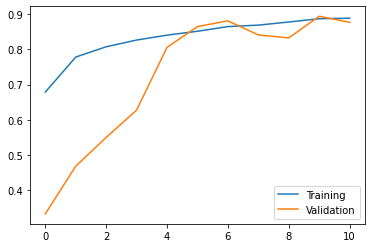

In [36]:
accs = h.history['accuracy']
val_accs = h.history['val_accuracy']

plt.plot(range(len(accs)), accs, label='Training')
plt.plot(range(len(accs)), val_accs, label='Validation')
plt.legend()
plt.show()